# STUDENT PERFORMANCE INDICATOR

### Life cycle of Machine Learning Project
* Understanding the problem statement  
* Data Collection
* Data checks to perform
* Exploratory data analysis
* Date Pre-Processing
* Model Training
* Choose Best Model



### 1. Problem Statement  
* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation Course.

### 2. Data Collection
* Dataset Source - <a>https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977</a>
* The data consists of 8 columns and 1000 rows.

### 2.1. Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library. 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading the CSV Data

In [82]:
df= pd.read_csv("data/stud.csv")

In [83]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [84]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [86]:
df.shape

(1000, 8)

### 2.2. Dataset information
* gender: sex of students -> (Male/Female)
* race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score


### 3. Data checks to perform
* Missing values
* Duplicates
* Check data type
* the number of unique values of each column
* statistics of dataset
* Check various categories present in the different categorical column

### 3.1. Check Missing Values

In [87]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No missing values

### 3.2 Check Duplicates

In [88]:
df.duplicated().sum()

0

No duplicate values

3.3 Check Data types

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4. Checking the number of unique valies of each column

In [90]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [91]:
df["test_preparation_course"].unique()

array(['none', 'completed'], dtype=object)

In [92]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

### 3.5. Check statistics of data set

In [93]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight  
* All means are very close to each other.
* All standard deviation is also close.
* min for math = 0, whereas for reading = 17 and for writing = 10

### 3.7. Exploring Data

In [94]:
print(f"Categories in 'gender' => {df['gender'].unique()}")
print(f"Categories in 'race/ethinicity' => {df['race_ethnicity'].unique()}")
print(f"Categories in 'parental education level' => {df['parental_level_of_education'].unique()}")
print(f"Categories in 'lunch' => {df['lunch'].unique()}")
print(f"Categories in 'test prep' => {df['test_preparation_course'].unique()}")

Categories in 'gender' => ['female' 'male']
Categories in 'race/ethinicity' => ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental education level' => ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' => ['standard' 'free/reduced']
Categories in 'test prep' => ['none' 'completed']


In [95]:
# define numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#printing columns
print(f"numerical features => {numeric_features}")
print(f"categorical features => {categorical_features}")

numerical features => ['math_score', 'reading_score', 'writing_score']
categorical features => ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8. Adding columns for "total score" and "Average"

In [96]:
df["total_score"] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [97]:
reading_full = df[df['reading_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()

print(f"Number of students with full marks in Maths: {math_full}")
print(f"Number of students with full marks in Reading: {reading_full}")
print(f"Number of students with full marks in Writing: {writing_full}")

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [98]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f"Number of students with less than 20 marks in Maths: {math_less_20}")
print(f"Number of students with less than 20 marks in writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in reading: {reading_less_20}")

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in reading: 1


Insights
* Students have performed worst in Maths
* Best performed in Reading

### 4. Exploring Data (Visualization)

### 4.1. Visualize average score distribution to make some conclusion
* histogram
* Kernel Distribution function (KDE)

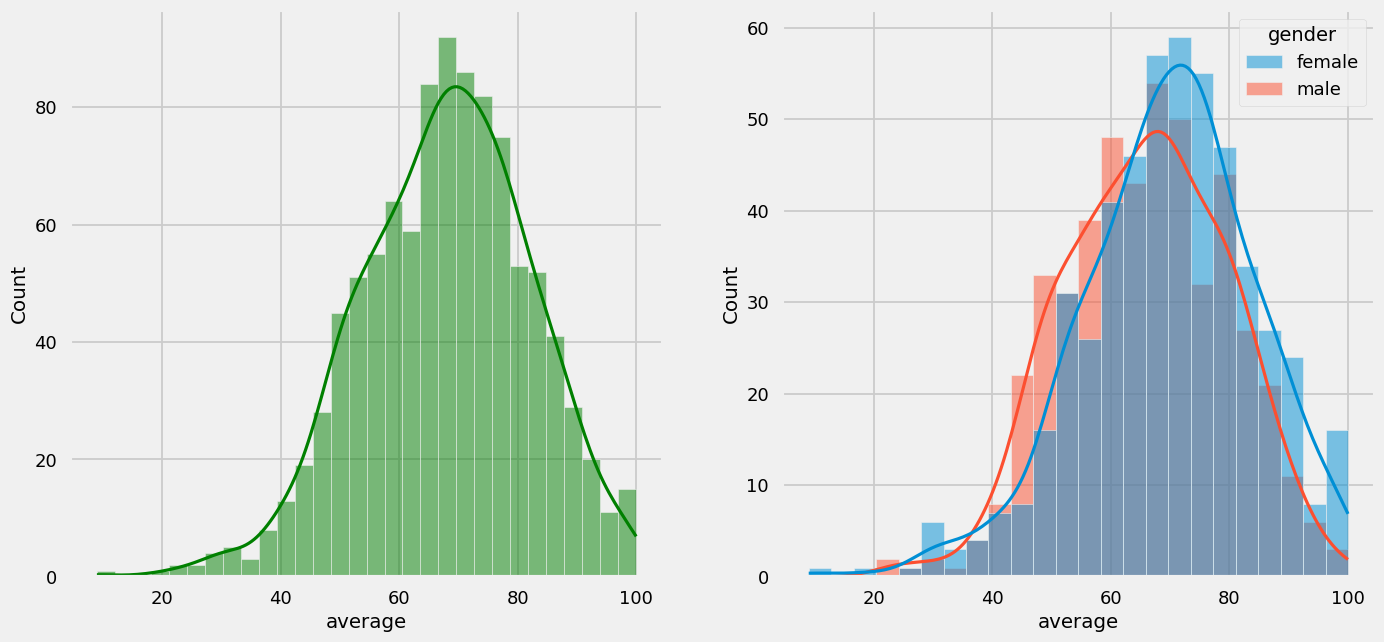

In [99]:
fig, axs = plt.subplots(2,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x= 'average', bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

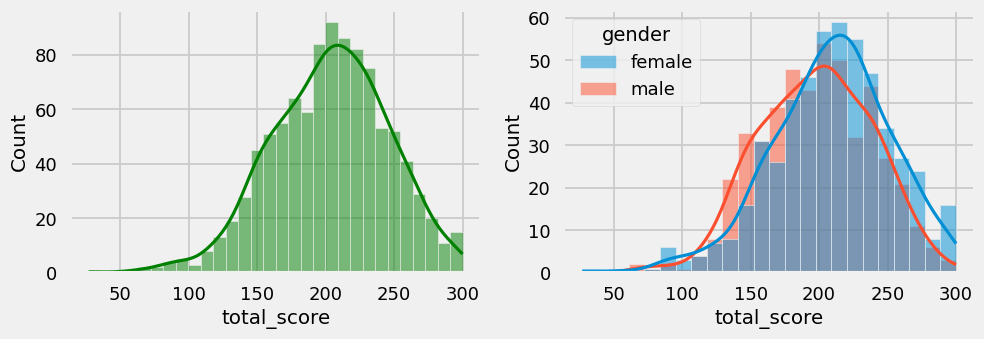

In [100]:
plt.subplot(221)
sns.histplot(data=df, x='total_score', kde=True, bins=30, color = 'g')
plt.subplot(222)
sns.histplot(data=df, x="total_score", hue='gender', kde=True)
plt.show()

Insights
* Females students tend to perform better than male students.

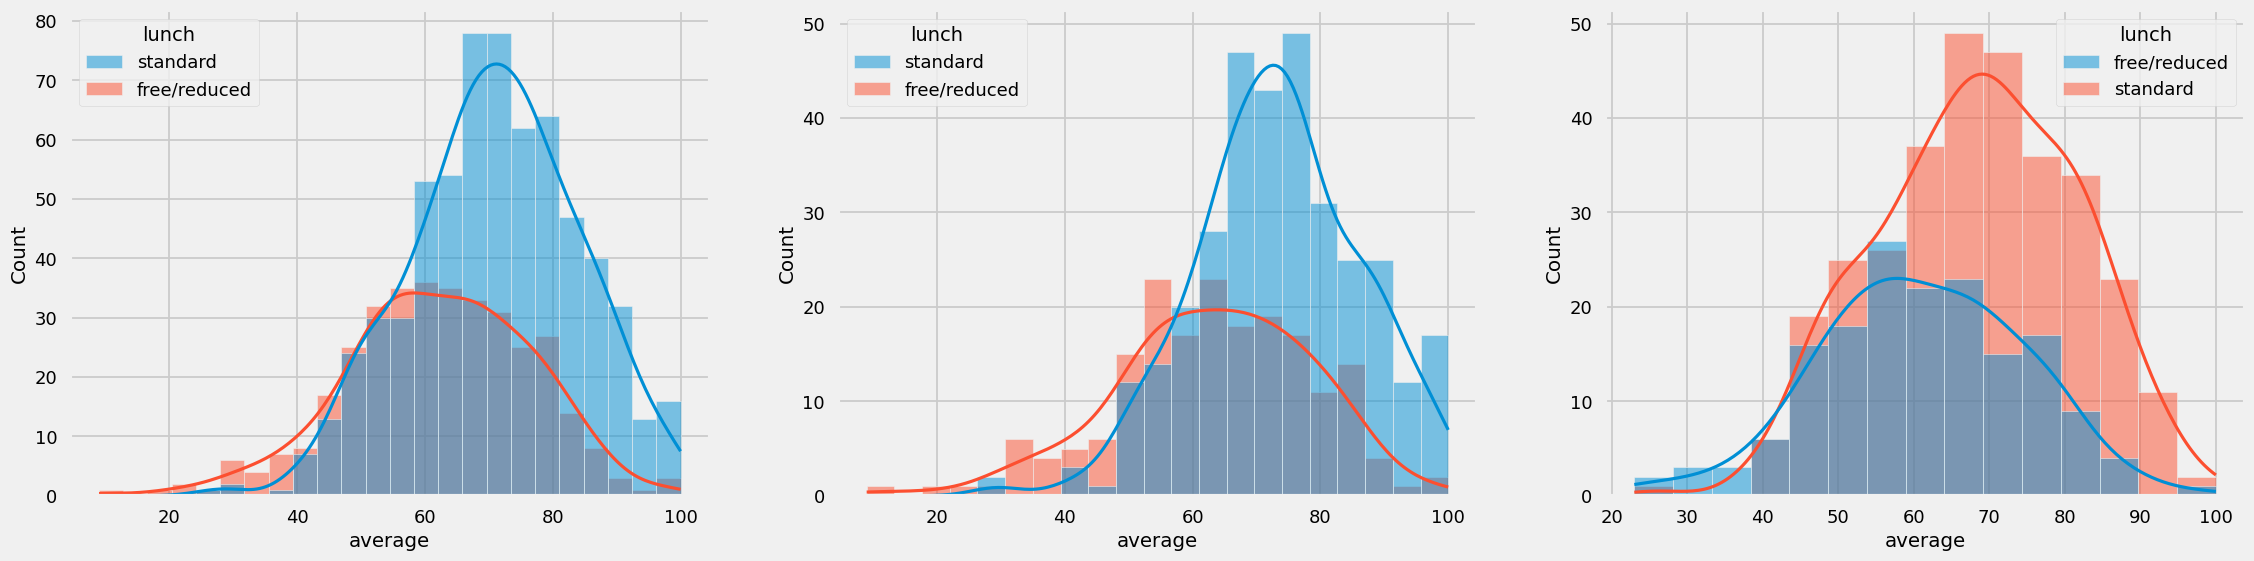

In [101]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.show()

Insights
* standard lunch helps perform well in exams
* standard lunch helps perform well in exams for both male and female

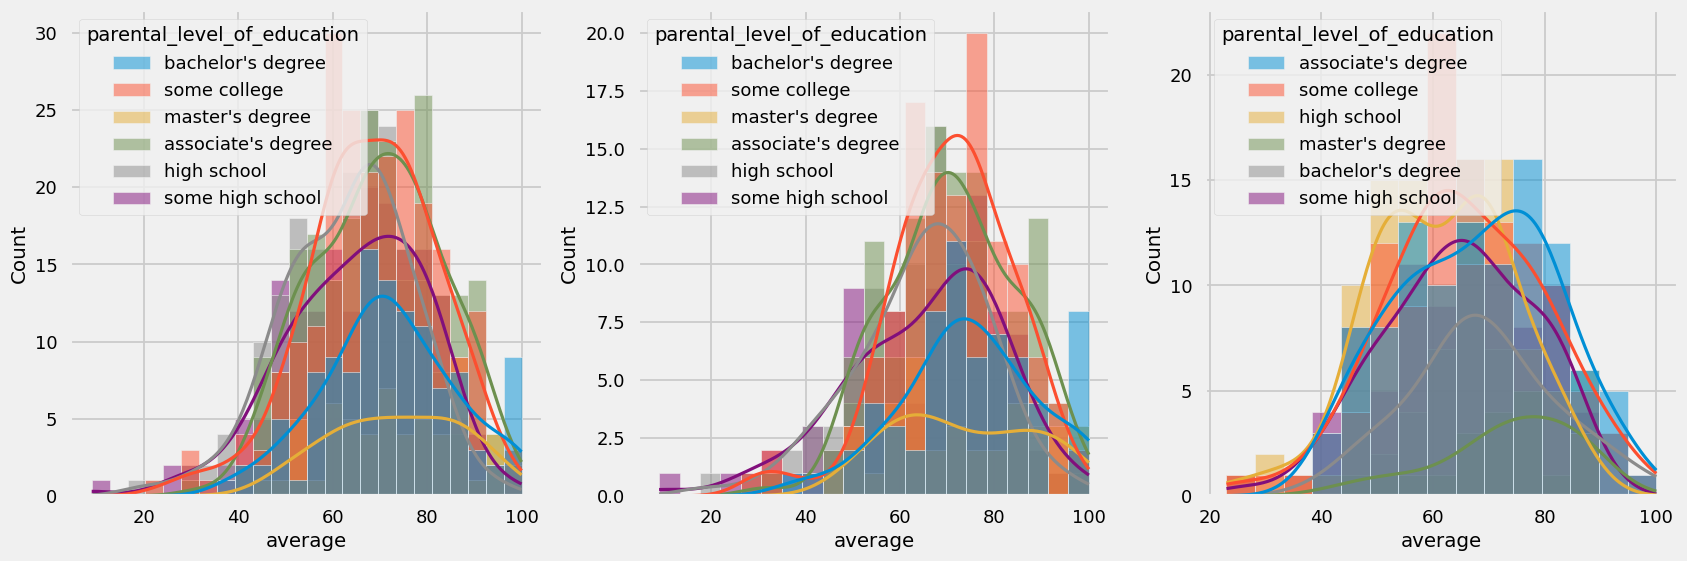

In [102]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

Insights
* parent's education level doesn't have much affect in student's marks
* 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
* 2nd plot we can see there is no effect of parent's education on female students.

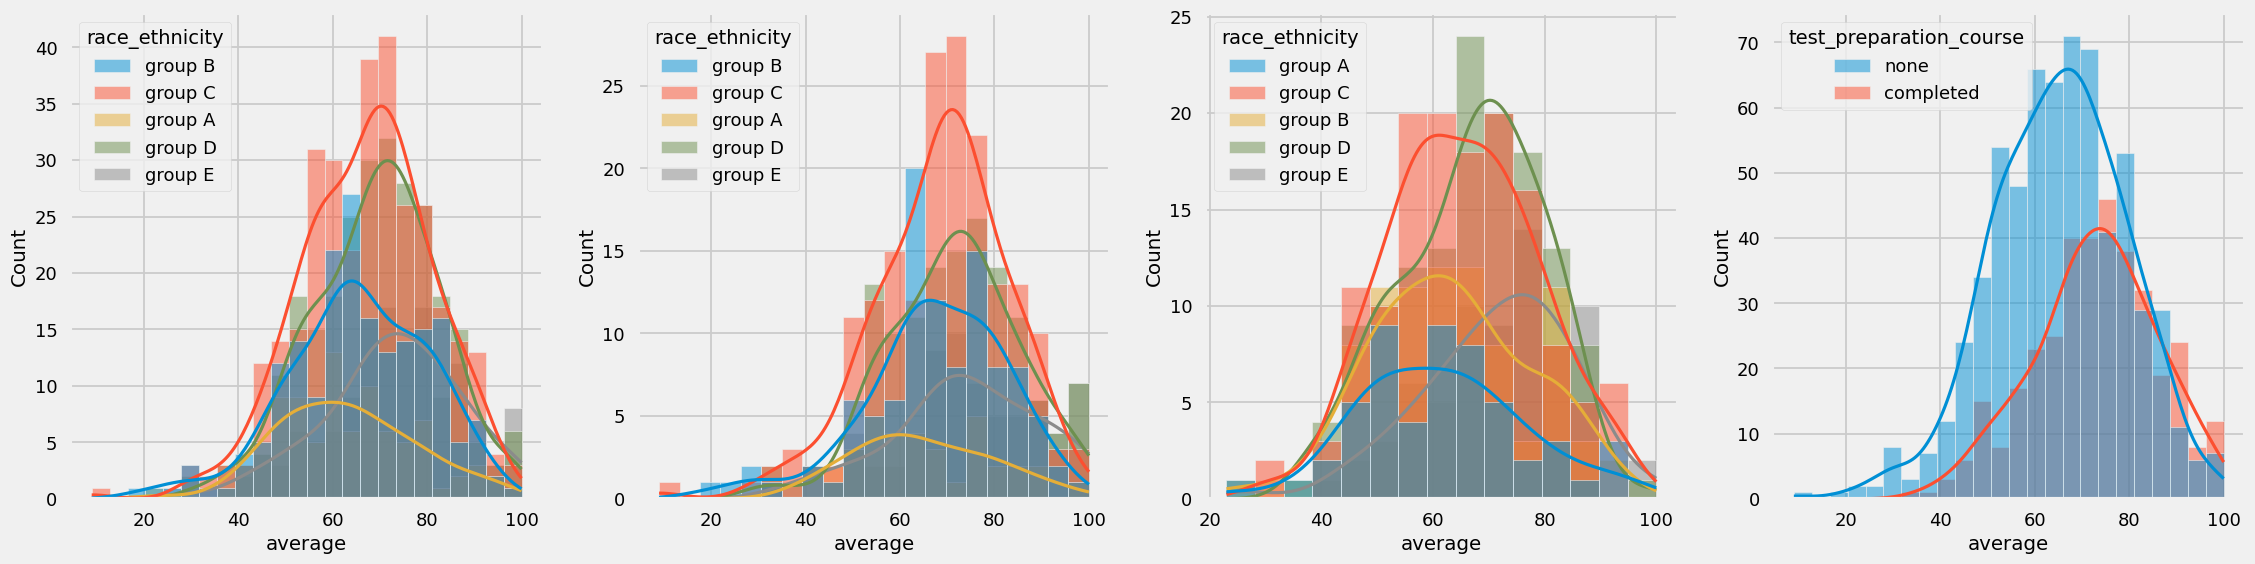

In [103]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(144)
sns.histplot(data=df,x='average', hue='test_preparation_course', kde=True)
plt.show()

Insights
* students of group A and B tend to perform poorly, irrespective of their gender.
* students who took test preparatory course, scored higher.

### 4.2. Maximum score of students in all three subjects

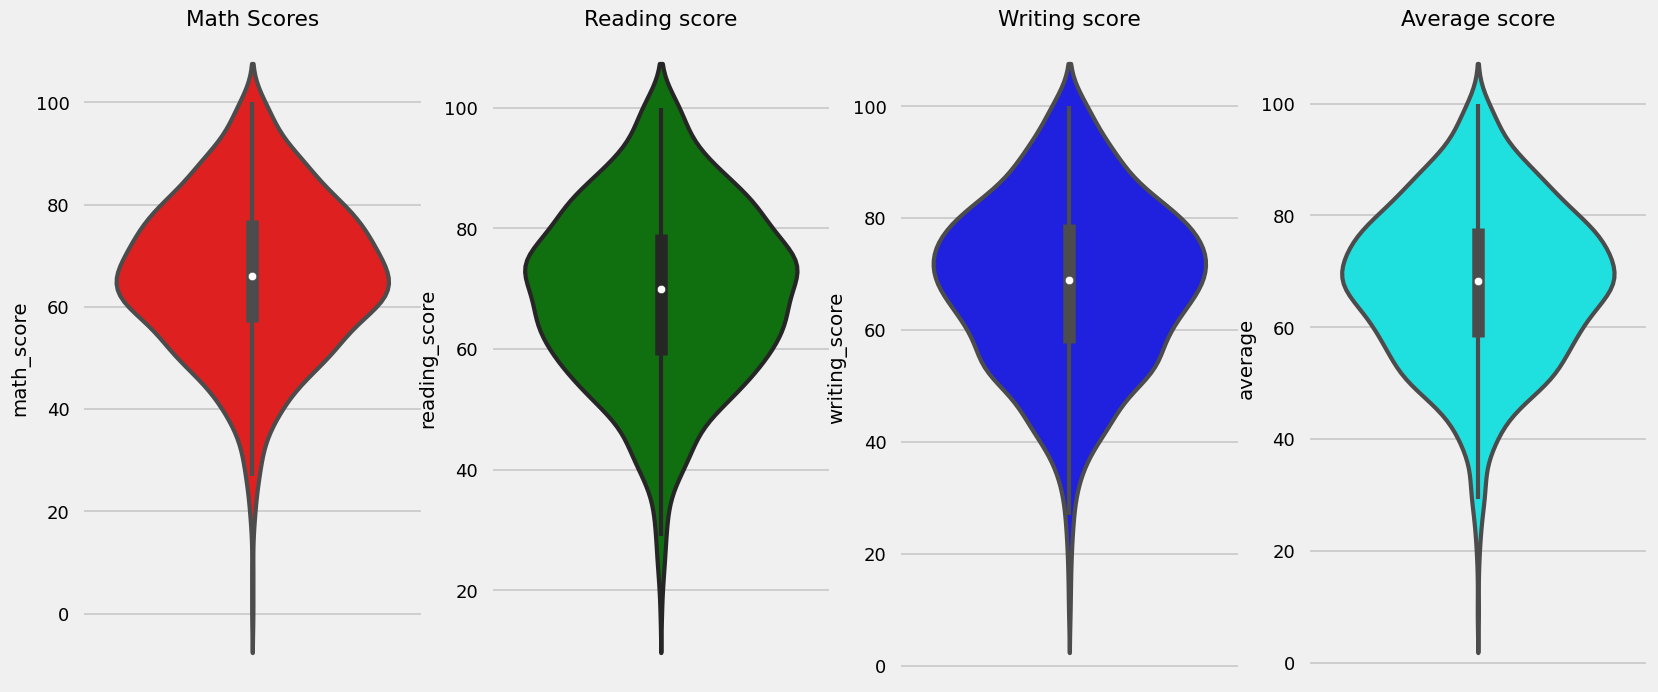

In [104]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math_score', data=df, color = 'red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading score')
sns.violinplot(data=df, y='reading_score', color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing score')
sns.violinplot(data=df, y='writing_score', color='blue', linewidth=3)
plt.subplot(1,4,4)
plt.title('Average score')
sns.violinplot(data=df, y='average', color='cyan', linewidth=3)
plt.show()

Insights
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3. Multivariate analysis using pieplot

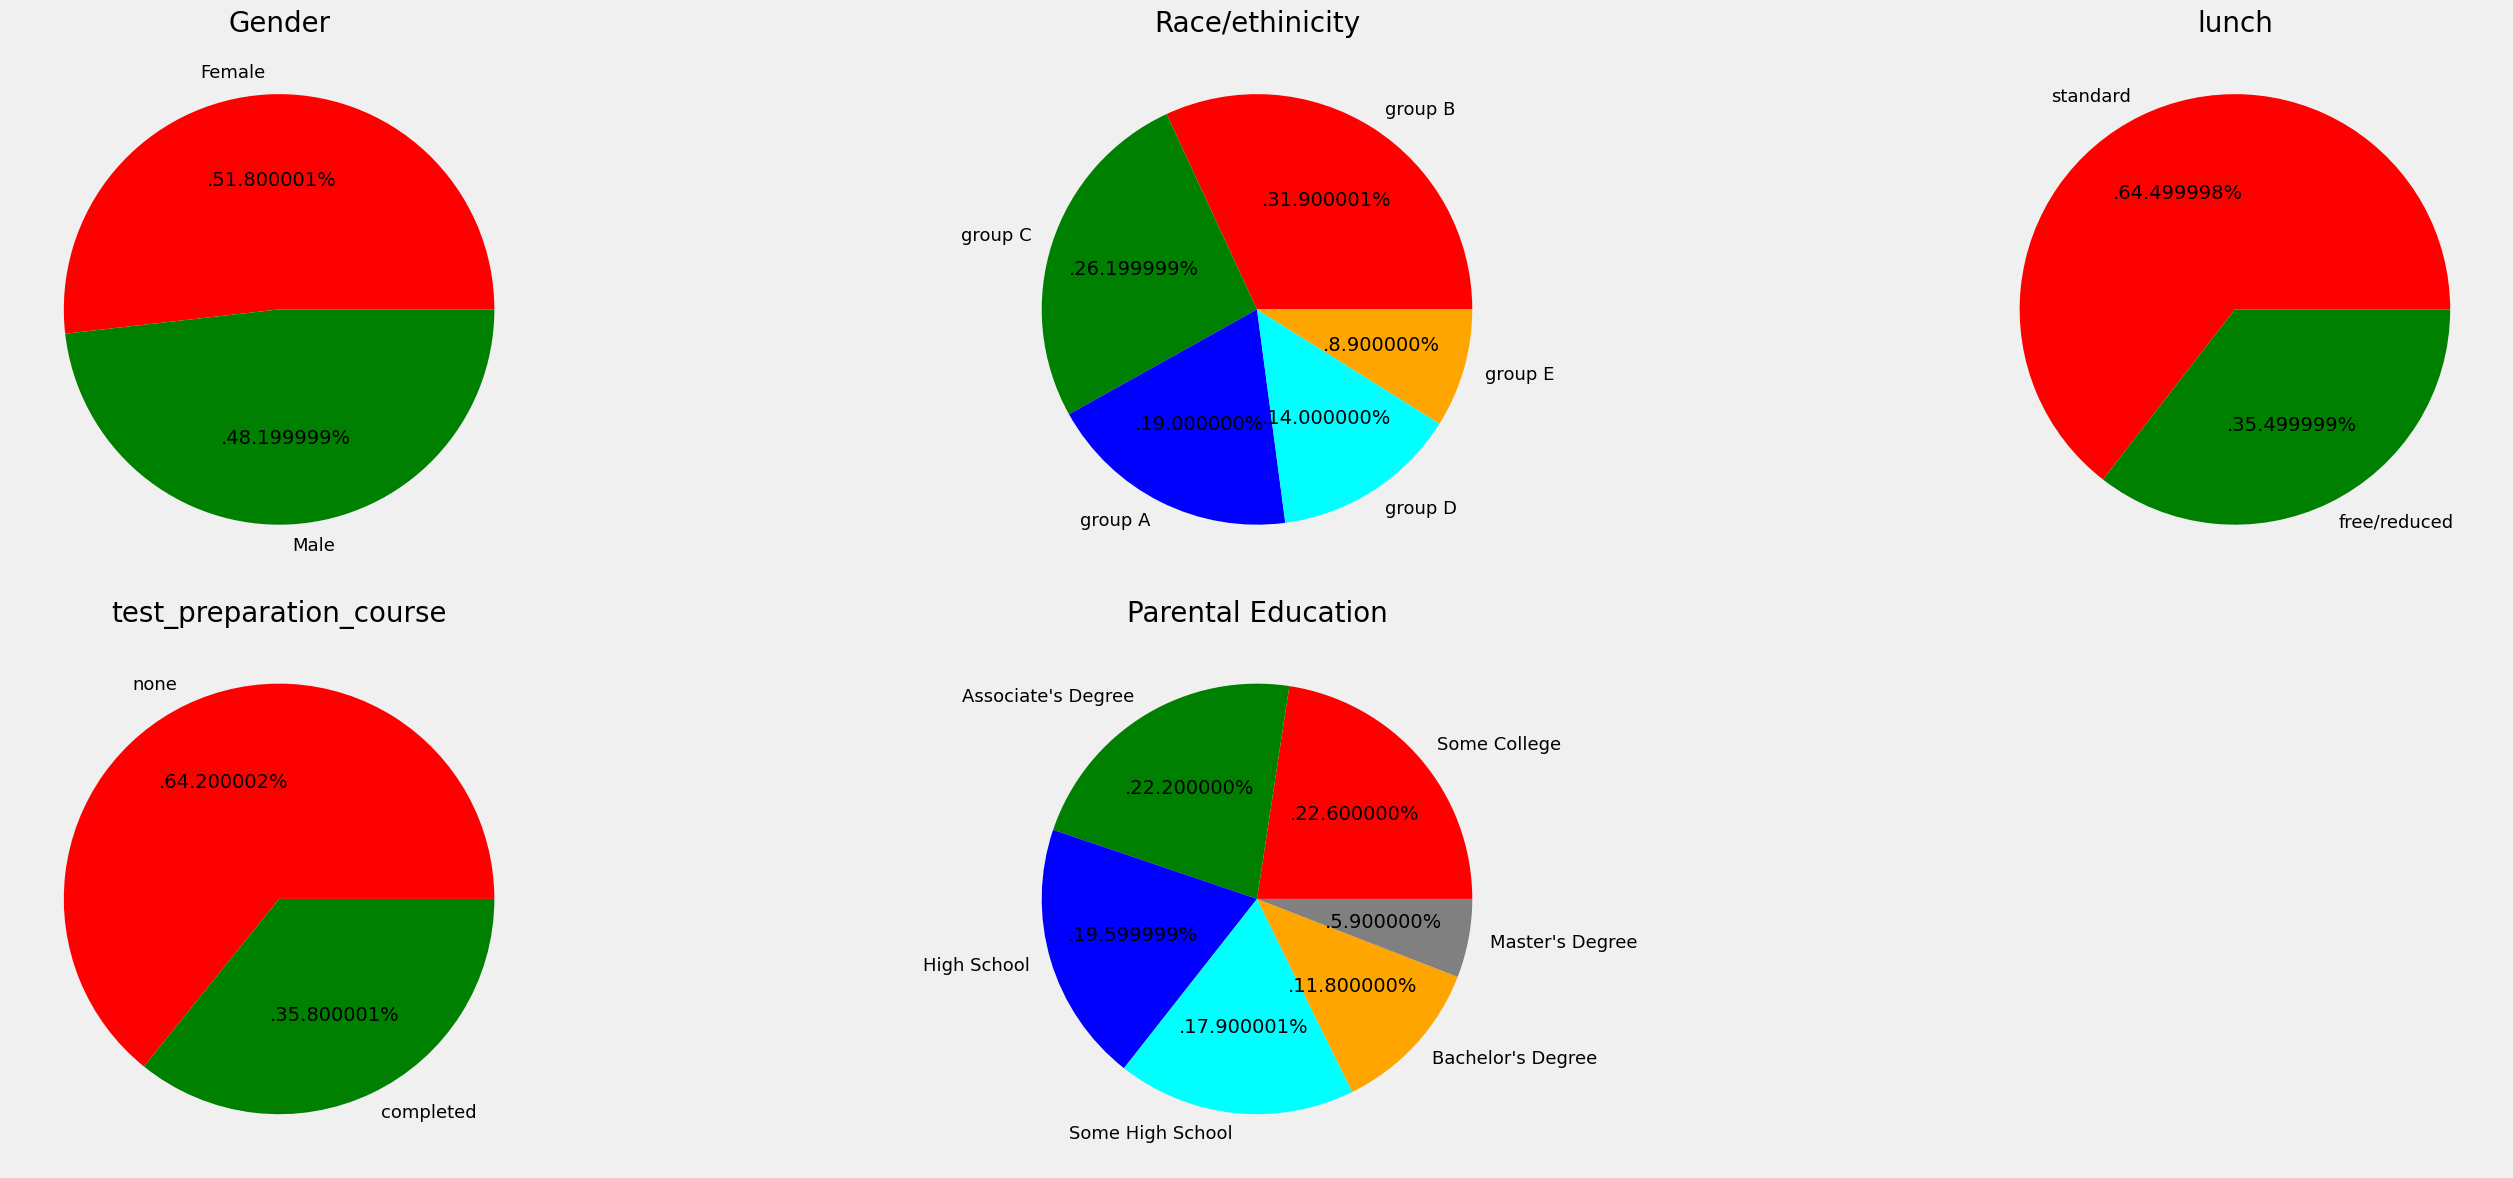

In [105]:
plt.rcParams['figure.figsize'] = (30,12)


plt.subplot(2,3,1)
size= df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,colors = color, labels=labels, autopct= '.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')



plt.subplot(2,3,2)
size= df['race_ethnicity'].value_counts()
labels = df['race_ethnicity'].unique()
color = ['red','green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/ethinicity', fontsize=20)
plt.axis('off')



plt.subplot(2,3,3)
size= df['lunch'].value_counts()
labels = df['lunch'].unique()
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('lunch', fontsize=20)
plt.axis('off')



plt.subplot(2,3,4)
size= df['test_preparation_course'].value_counts()
labels = df['test_preparation_course'].unique()
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('test_preparation_course', fontsize=20)
plt.axis('off')



plt.subplot(2, 3, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()


Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization

#### 4.4.1. Gender column
* How is distribution of gender?
* Is gender has any impact on student's performance?

##### Univariate Analysis (How is distribution of Gender?)

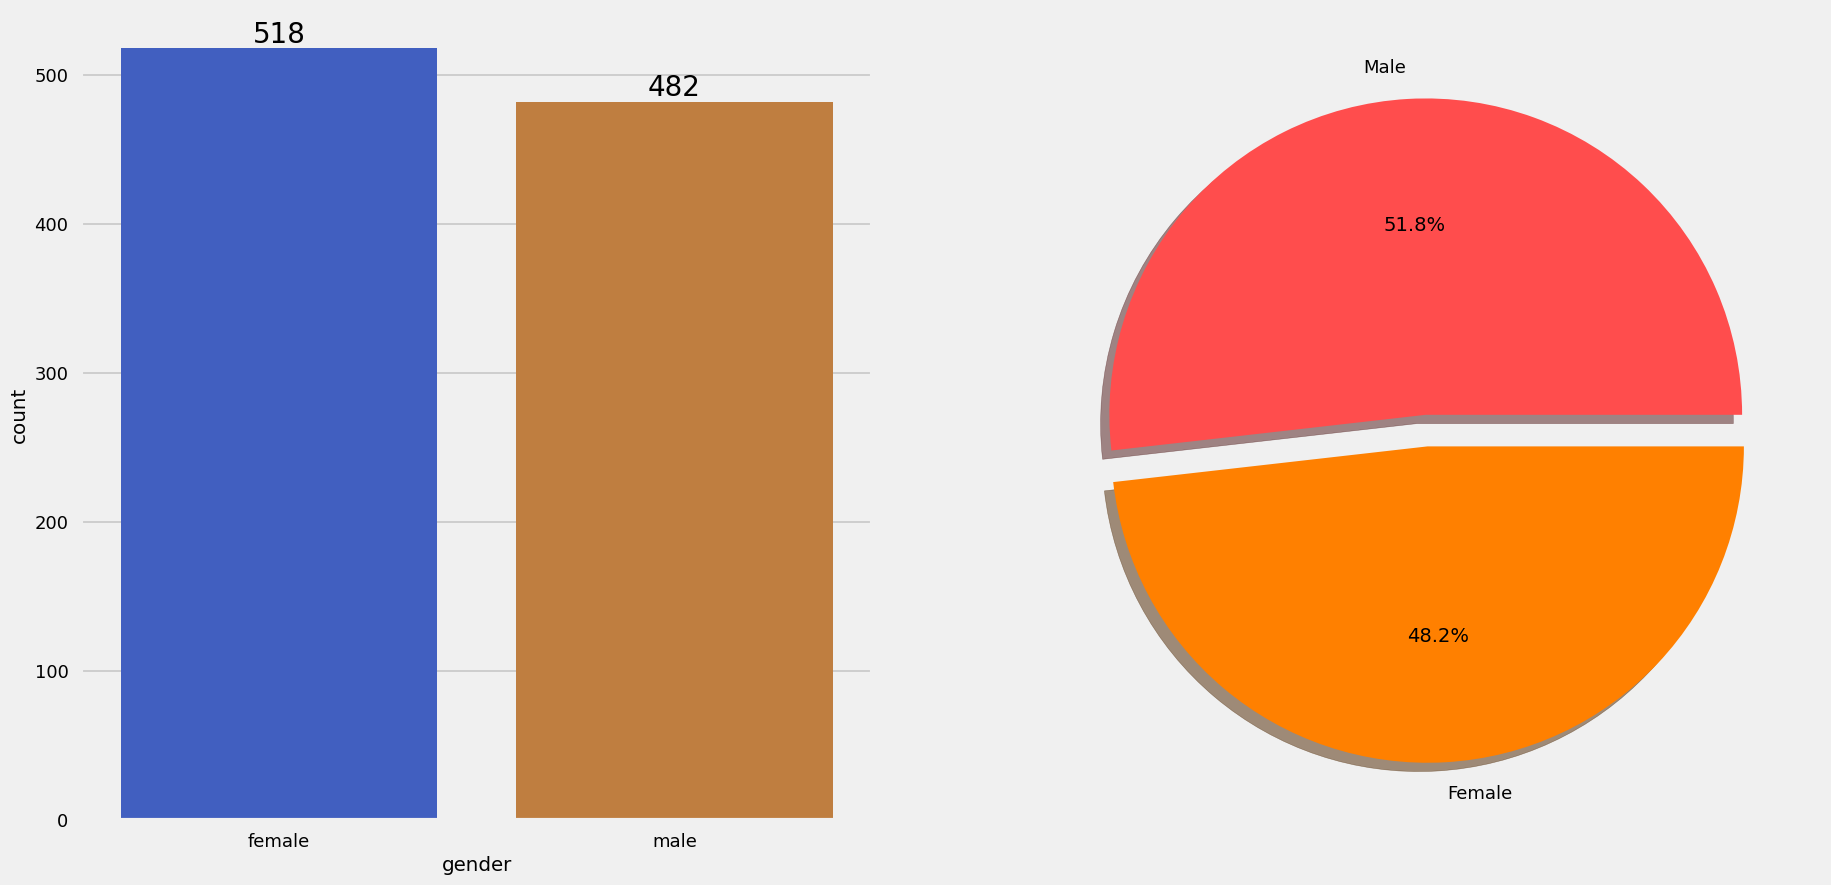

In [106]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright',
              ax=ax[0], saturation=0.5)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],
        explode=[0,0.1],autopct='%1.1f%%',shadow=True,
        colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
* Gender has balanced data with female students are 518 (48%) and male students are 482(52%)

##### Bivariate Analysis (Is gender has any impact of student's performance?)

In [107]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


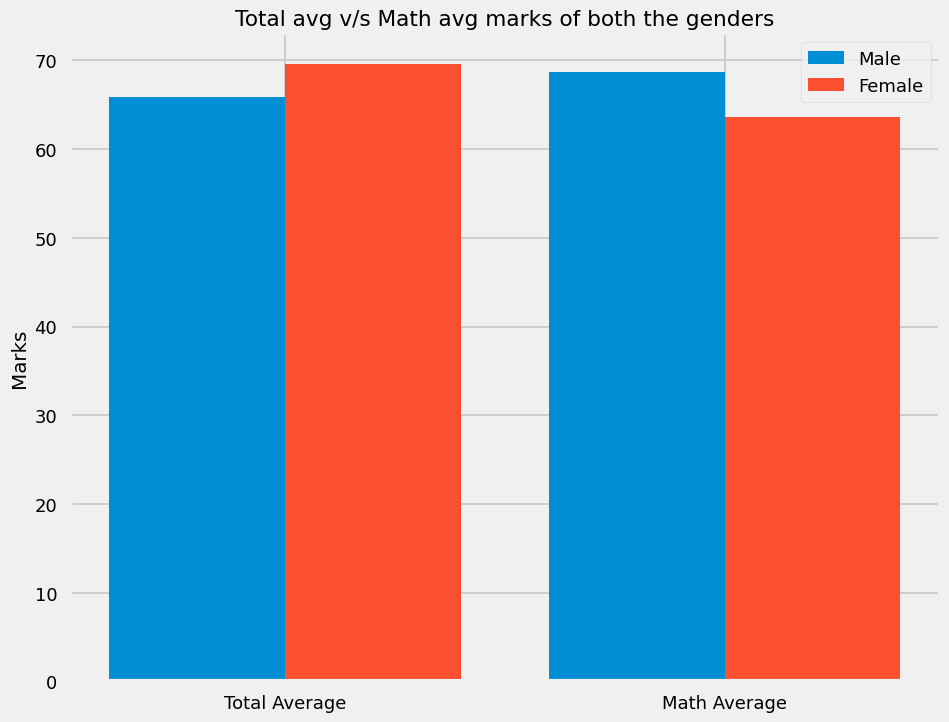

In [108]:
plt.figure(figsize=(10,8))

X=['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title("Total avg v/s Math avg marks of both the genders")
plt.legend()
plt.show()

Insights
* On avg females have better score
* whereas males have scored higher in Maths

#### 4.4.2 Race/Ethinicity Column
* How is group wise distribution?
* Is race/ethinicity has any impact on student's performance?


##### Univariate analysis (How is group wise distribution?)

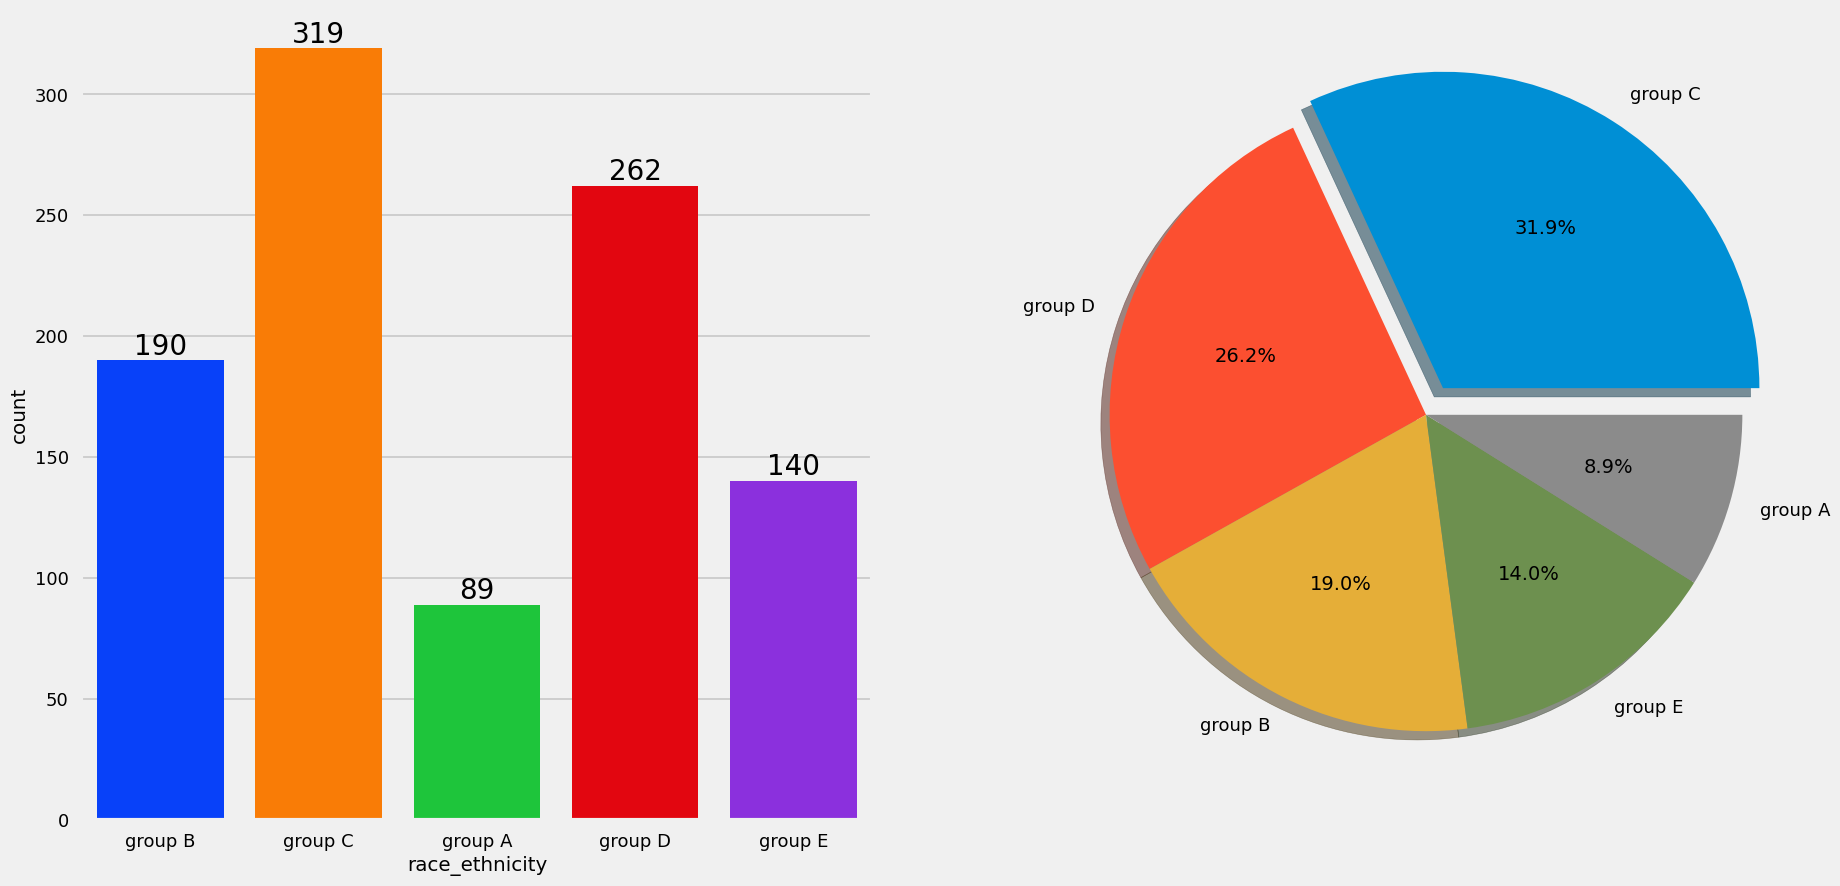

In [109]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,size=20, color='black')

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index
        ,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)

plt.show()

Insights
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

##### Bivariate analysis (Is Race/ethinicity has any impact on students scores?)

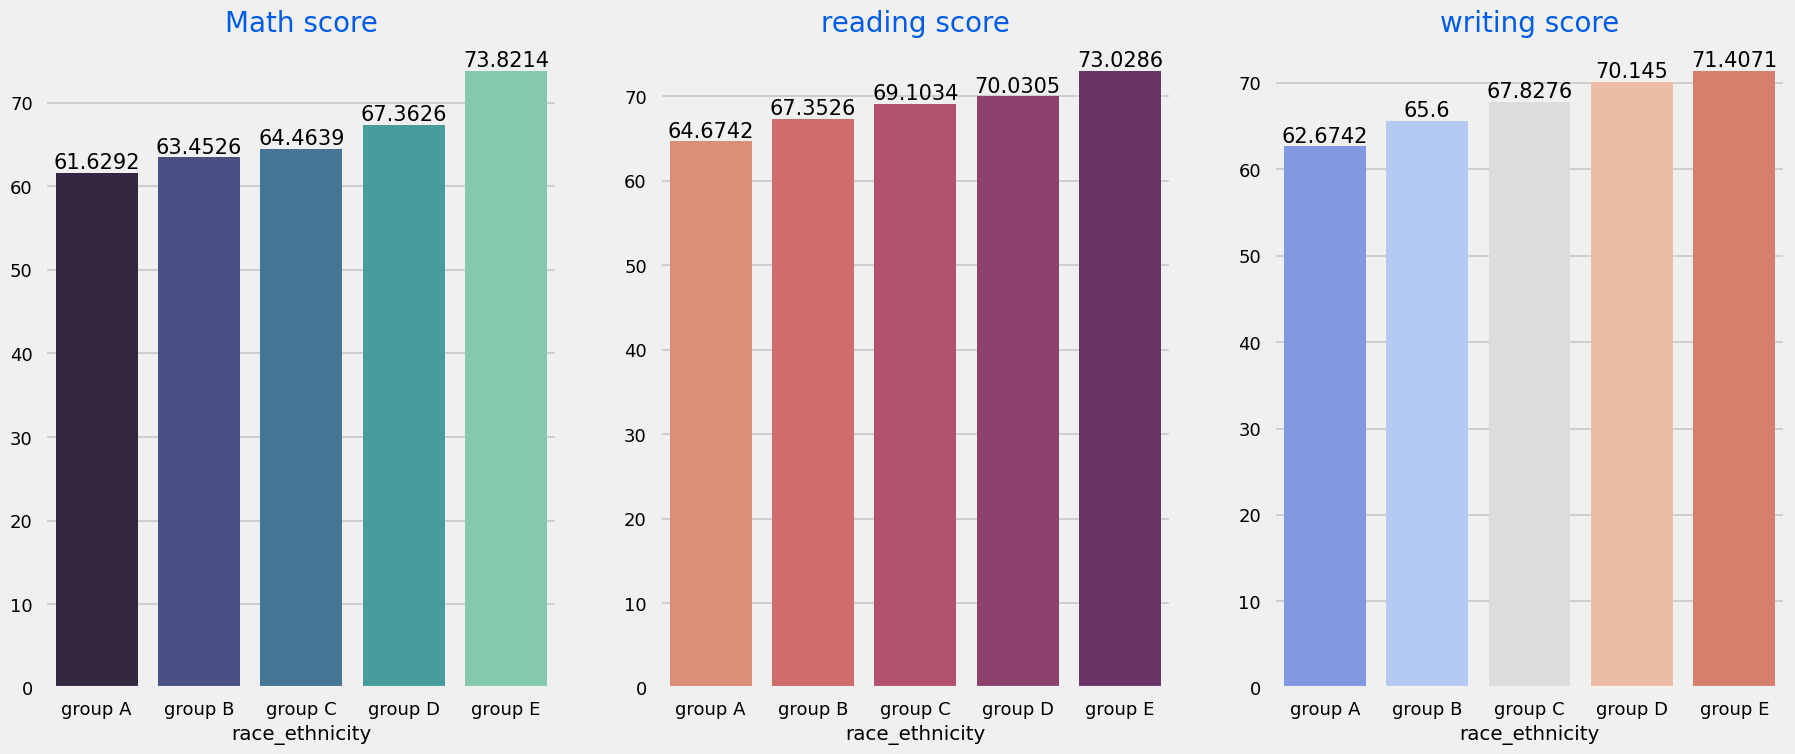

In [110]:
Group_data2 = df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3, figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index, 
            y=Group_data2['math_score'].mean().values, 
            palette='mako',ax=ax[0])
ax[0].set_title('Math score', size=20, color='#005ce6')

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index, 
            y=Group_data2['reading_score'].mean().values, 
            palette='flare',ax=ax[1])
ax[1].set_title('reading score', size=20, color='#005ce6')

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index, 
            y=Group_data2['writing_score'].mean().values, 
            palette='coolwarm',ax=ax[2])
ax[2].set_title('writing score', size=20, color='#005ce6')

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 Parental Level of education column
* what is educational background of student's parent?
* Is parental education has any impact on student's performance?

##### Univariate analysis

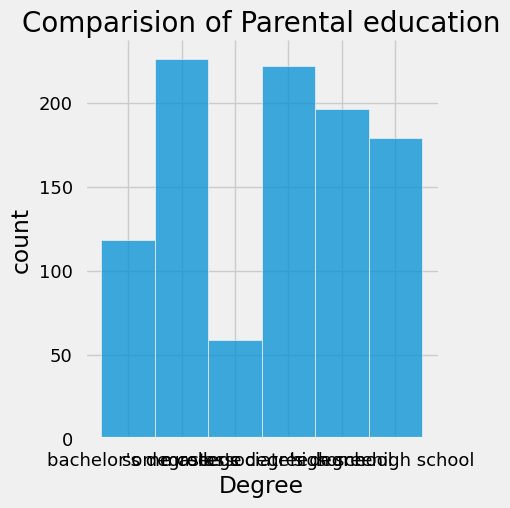

In [111]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.displot(df['parental_level_of_education'], palette='Blues')
plt.title('Comparision of Parental education', fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

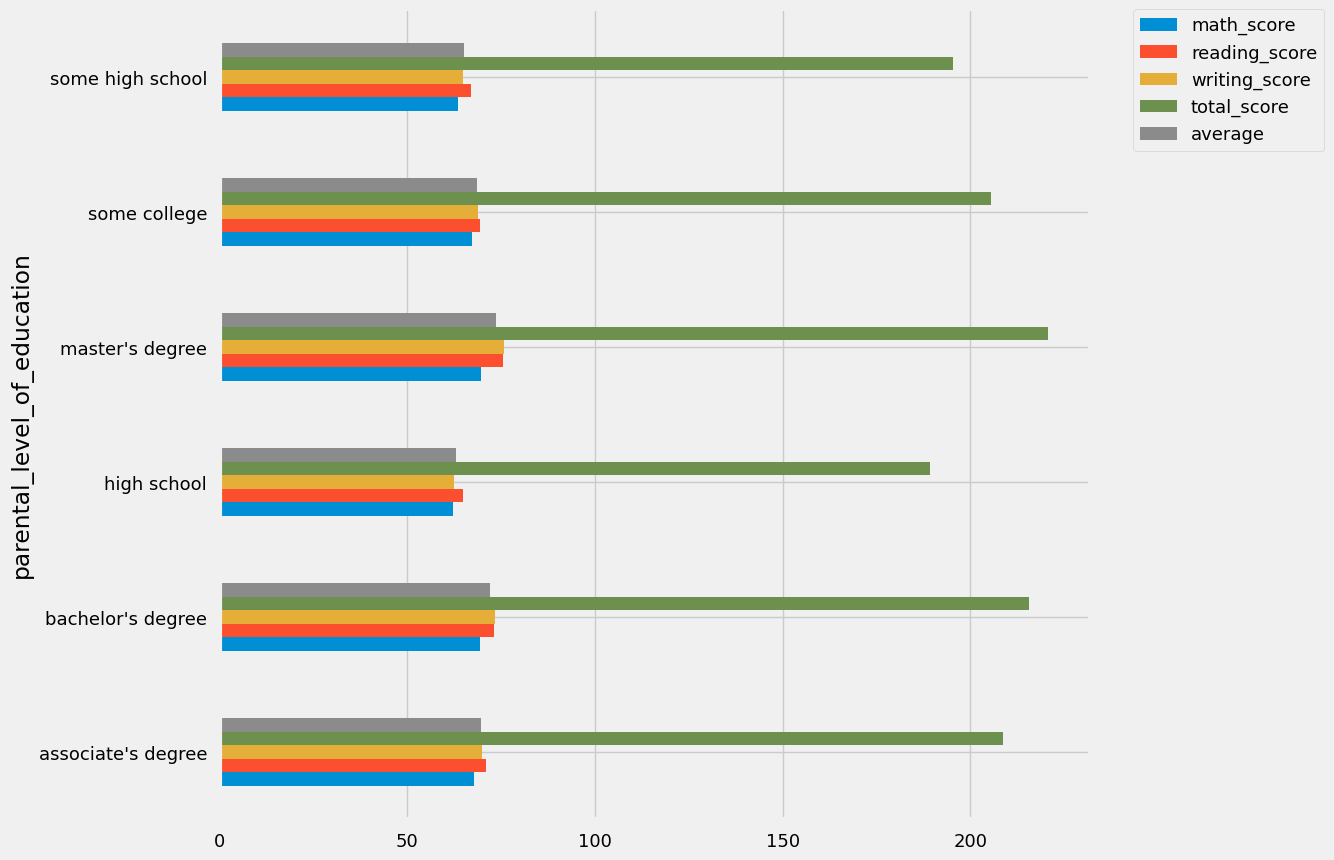

In [112]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

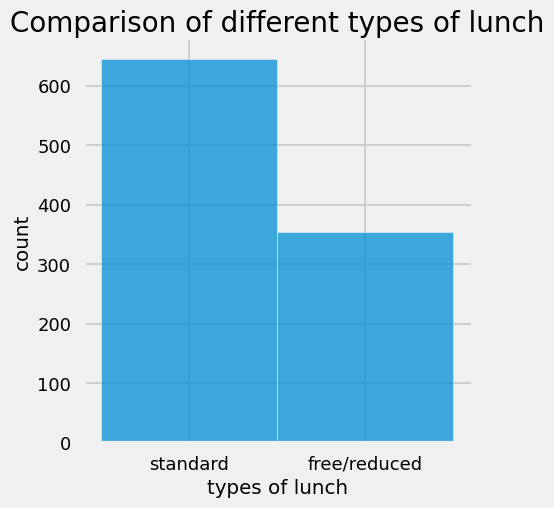

In [113]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.displot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

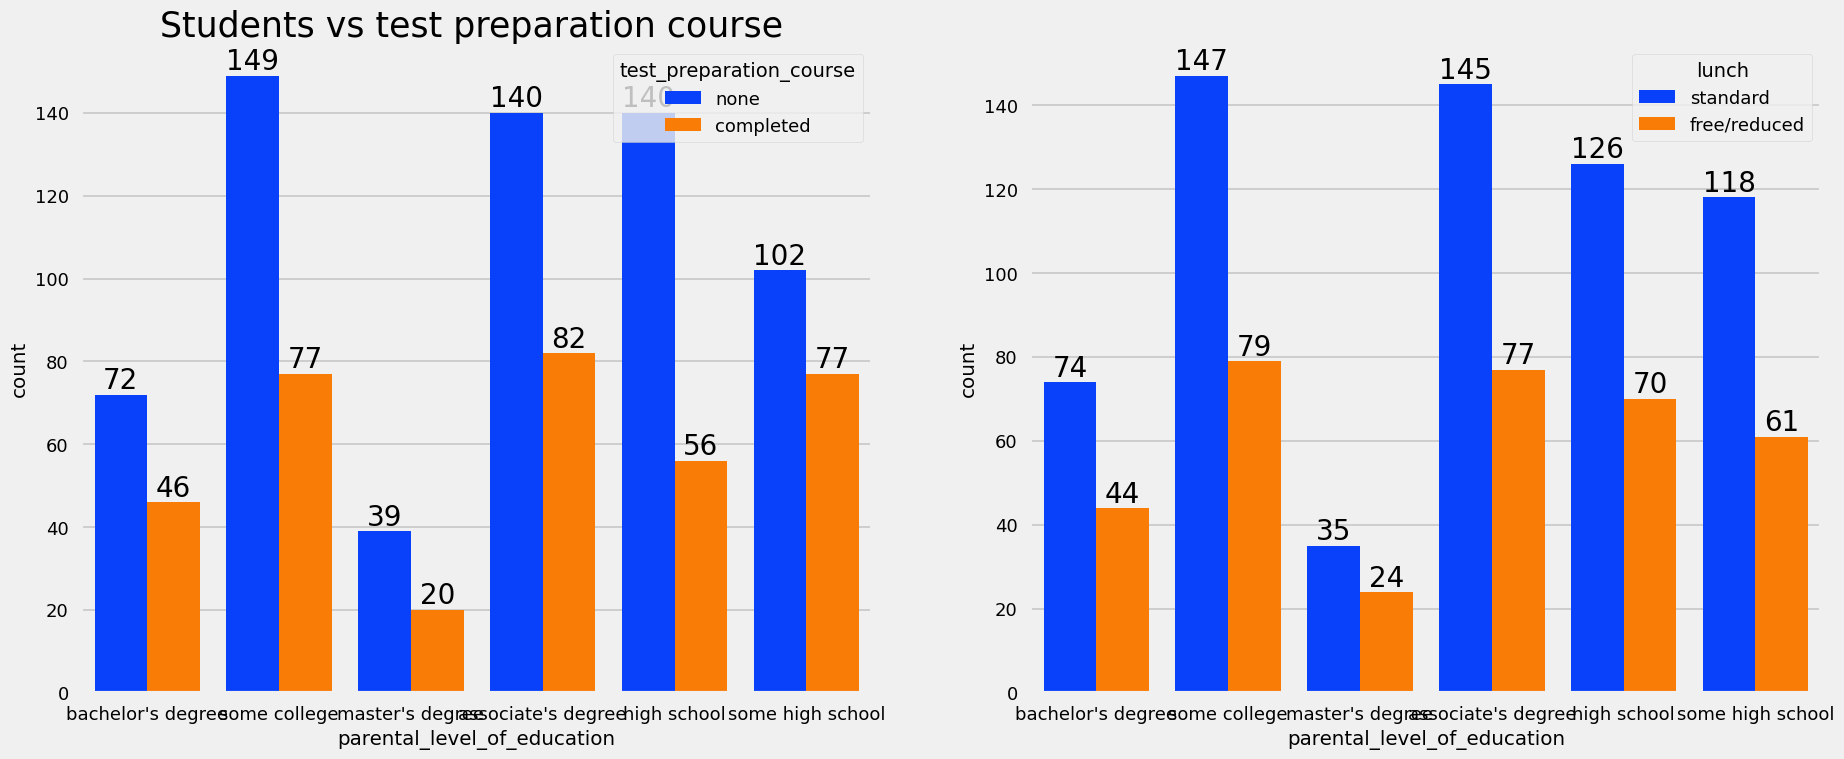

In [114]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

#### 4.4.5 TEST PREPARATION COURSE COLUMN

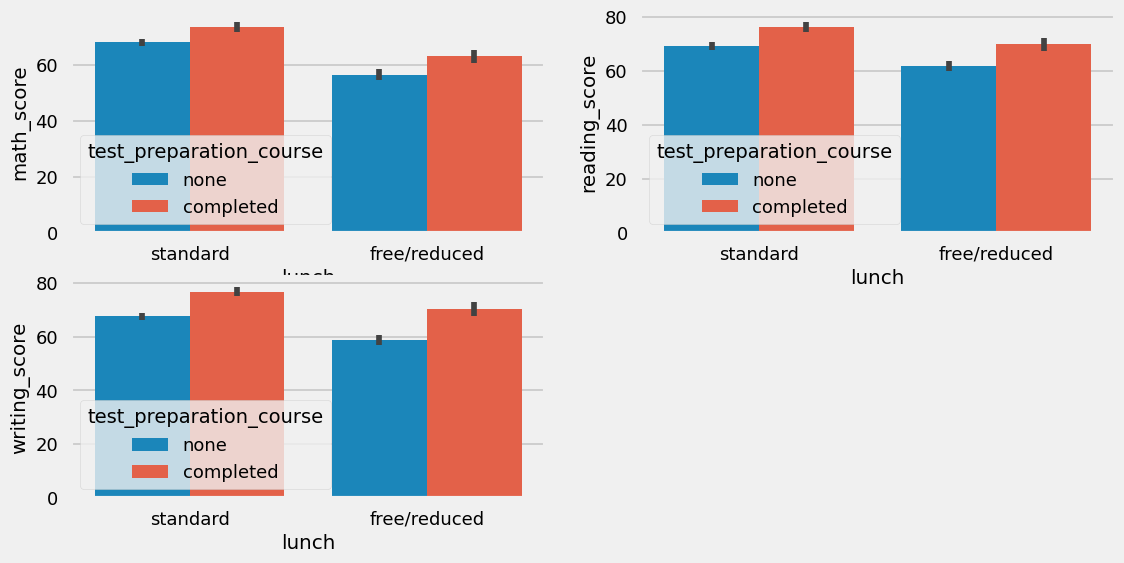

In [115]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.show()

#### 4.4.6 Checking outliers

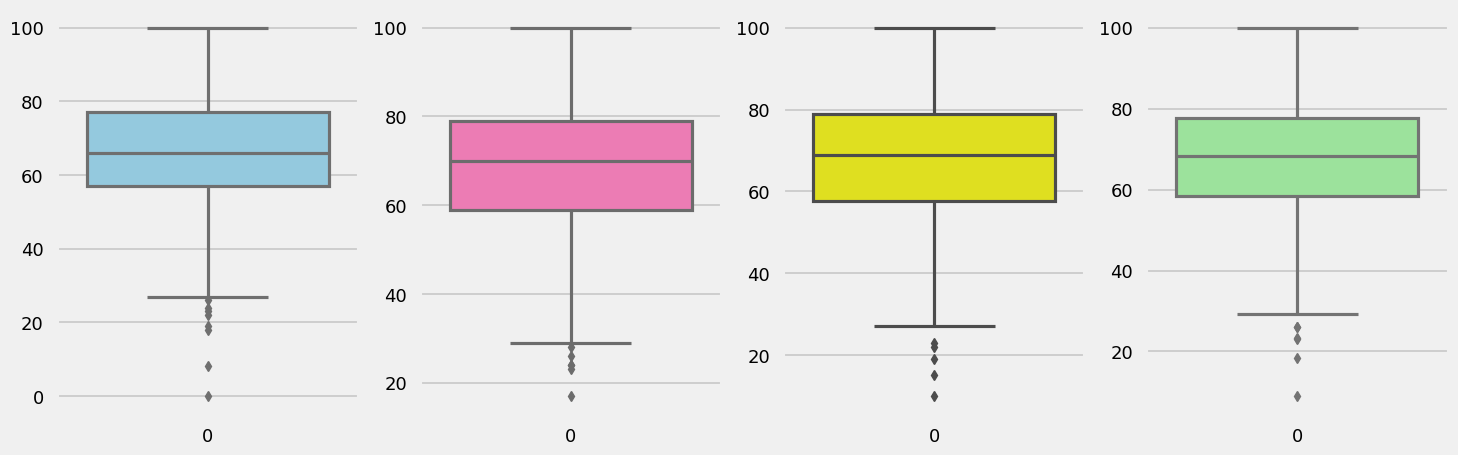

In [116]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT


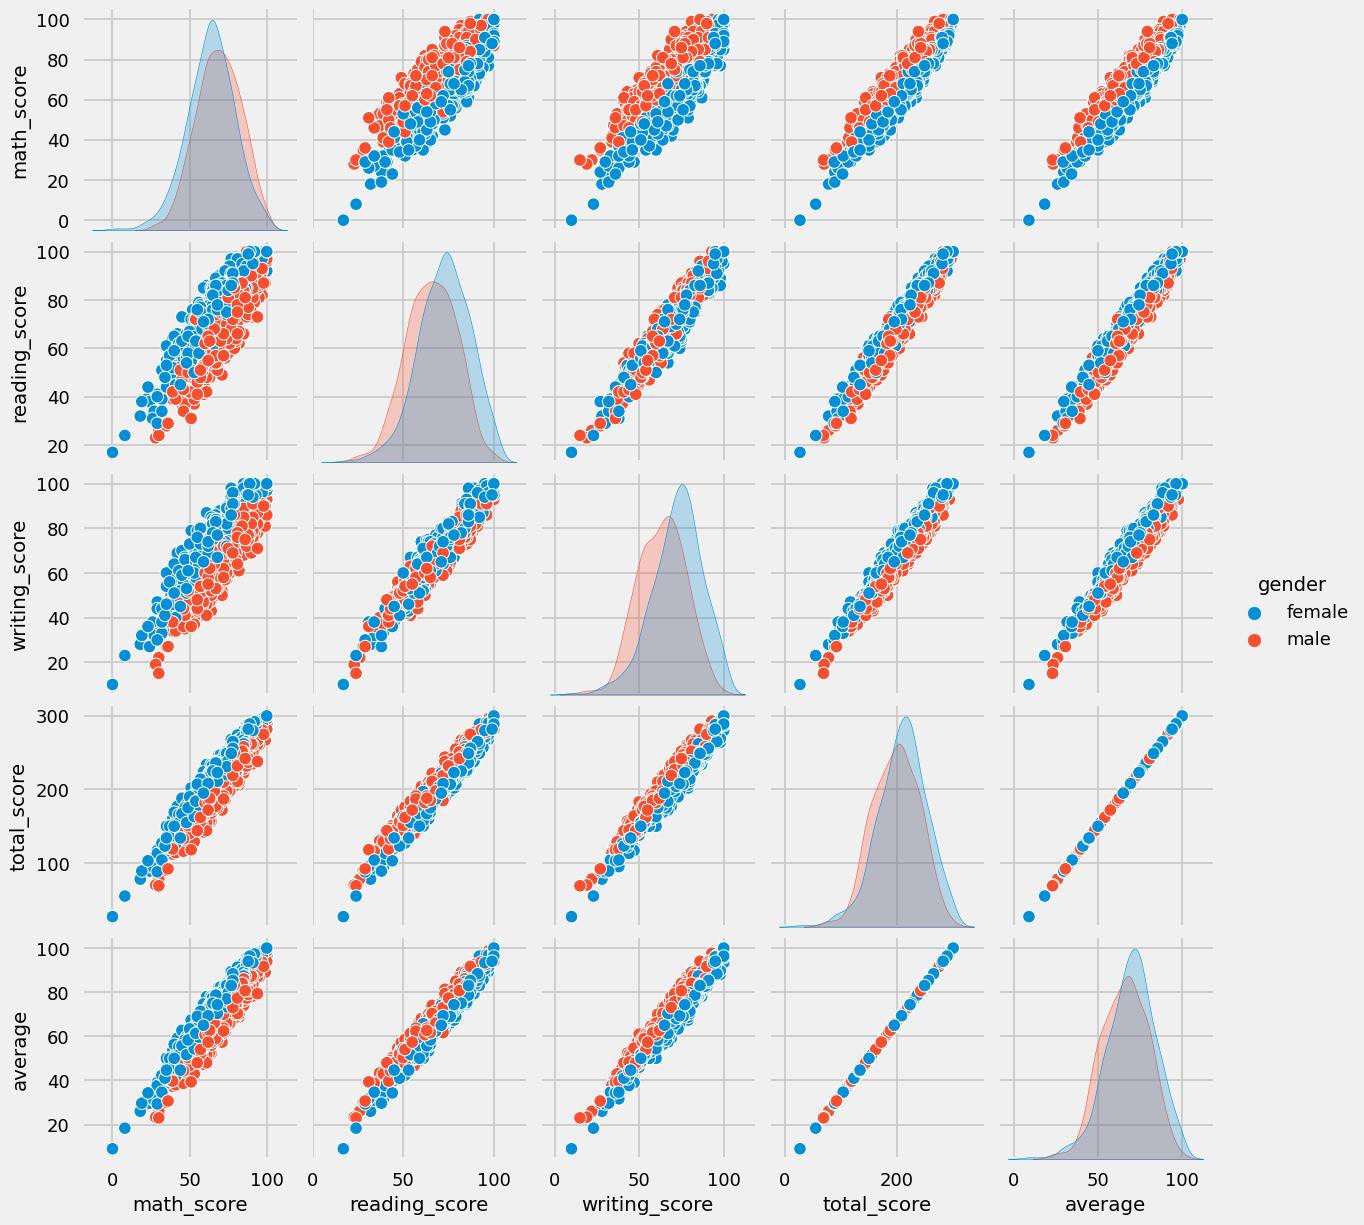

In [117]:
sns.pairplot(df,hue = 'gender')
plt.show()

### 5. Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.